In [1]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge,LinearRegression
from tabulate import tabulate



In [18]:
weather = pd.read_csv('/content/drive/MyDrive/Weather2.csv')
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'],cache=True)
weather = weather.sort_values(by='Formatted Date',ascending = True)
weather.reset_index(drop=True,inplace=True)
weather2 = weather[0:3000:]
weather2 = weather2.sort_values(by='Formatted Date',ascending = True)

weather2.reset_index(drop=True,inplace=True)



features = weather2.drop('Temperature (C)',axis=1)
labels = weather2['Temperature (C)']
weather2


<ipython-input-18-a5f9cf165342>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'],cache=True)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00+01:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00+01:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00+01:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00+01:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00+01:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2006-05-05 20:00:00+02:00,Mostly Cloudy,rain,15.244444,15.244444,0.49,2.5599,31.0,10.3523,0.0,1022.13,Partly cloudy starting in the afternoon.
2996,2006-05-05 21:00:00+02:00,Partly Cloudy,rain,11.344444,11.344444,0.69,7.5509,326.0,9.9820,0.0,1022.05,Partly cloudy starting in the afternoon.
2997,2006-05-05 22:00:00+02:00,Partly Cloudy,rain,12.111111,12.111111,0.61,10.4972,8.0,15.8263,0.0,1022.17,Partly cloudy starting in the afternoon.
2998,2006-05-05 23:00:00+02:00,Partly Cloudy,rain,10.705556,10.705556,0.67,9.5473,6.0,14.9569,0.0,1022.09,Partly cloudy starting in the afternoon.


Algorithm            Mean Squared Error    R^2-squared
-----------------  --------------------  -------------
Linear Regression             0.669923        0.987783
Decision Tree                 0.181471        0.996691
KNN                           2.97887         0.945677
Random Forest                 0.0563448       0.998972
Gradient Boosting             0.0888579       0.99838
AdaBoost                      1.14179         0.979178


<ipython-input-45-bdc1024557c9>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3',len(algorithms))


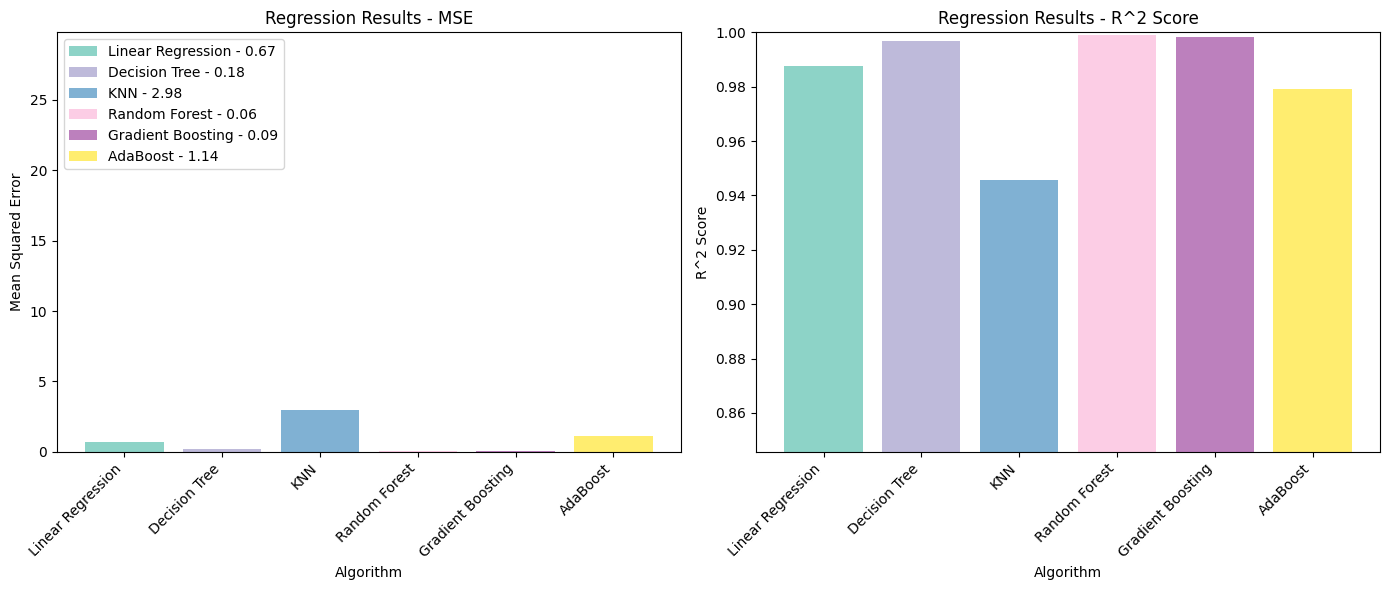

In [45]:
features = pd.get_dummies(features, drop_first = True)

def regress_and_evaluate(features, labels, plot_title = 'Regression Results'):
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

  regressors = {
      'Linear Regression': LinearRegression(),
      'Decision Tree': DecisionTreeRegressor(random_state=42),
      'KNN': KNeighborsRegressor(n_neighbors = 5),
      'Random Forest': RandomForestRegressor(n_estimators=100, random_state = 42),
      'Gradient Boosting': GradientBoostingRegressor(random_state = 42),
      'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state = 42)
  }

  results = []
  for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))

  headers = ["Algorithm", "Mean Squared Error", "R^2-squared"]
  print(tabulate(results, headers = headers))
  plot_results([result[0] for result in results],[result[1:] for result in results],plot_title)



def plot_results(algorithms, metrics, plot_title):
    #PLT MSE AND R^2 SCORE
    mse = [metric[0] for metric in metrics]
    r2_scores = [metric[1] for metric in metrics]
    colors = plt.cm.get_cmap('Set3',len(algorithms))

    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    bars = plt.bar(algorithms,mse,color=colors(range(len(algorithms))))
    plt.xlabel('Algorithm')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{plot_title} - MSE')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(mse)*10)
    legend_labels = [f'{name} - {mse_val:.2f}' for name, mse_val in zip(algorithms,mse)]
    plt.legend(bars,legend_labels,loc='upper left')



    #R^2
    plt.subplot(1,2,2)
    bars = plt.bar(algorithms,r2_scores,color=colors(range(len(algorithms))))
    plt.xlabel('Algorithm')
    plt.ylabel('R^2 Score')
    plt.title(f'{plot_title} - R^2 Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(min(r2_scores) - 0.1, 1)

    plt.tight_layout()
    plt.show()


regress_and_evaluate(features, labels)

**Random Forest has the highest R^2 Score and the lowest MSE, so that's going to be my primary choice.**

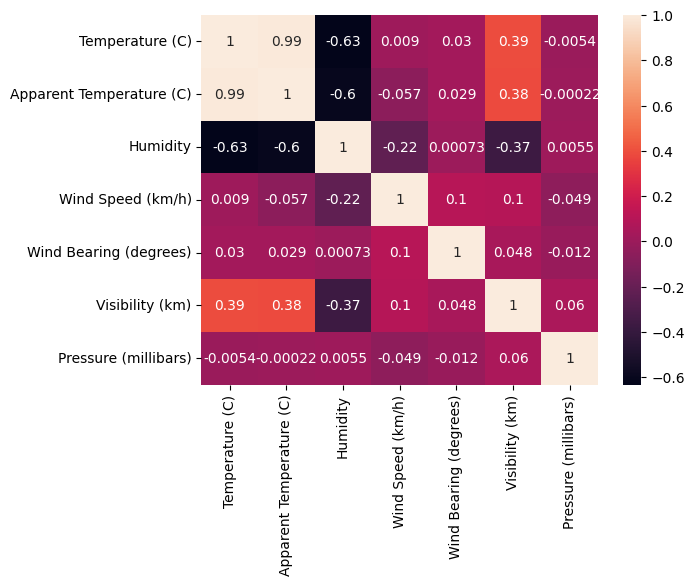

In [7]:

weatherheat = weather.drop(columns=['Formatted Date','Precip Type','Summary','Daily Summary','Loud Cover']).copy()


sb.heatmap(weatherheat.corr(),annot=True)
plt.show()



#

**Humidity correlates strongly wth Temperatures so that's going to be my independant variable.**



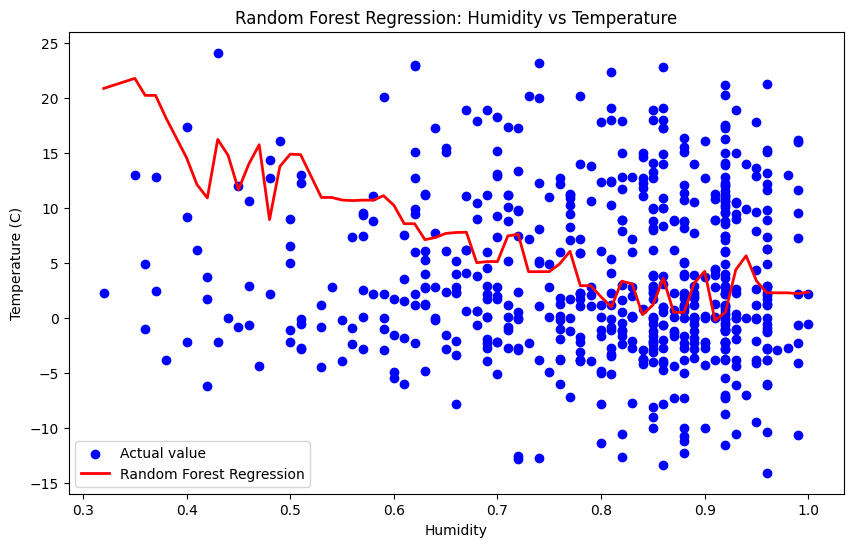

In [39]:
X = weather2[['Humidity']]
y = weather2['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

sorted_idx = X_test['Humidity'].argsort()
X_test = X_test.iloc[sorted_idx]
y_pred = y_pred[sorted_idx]


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual value')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Random Forest Regression')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('Random Forest Regression: Humidity vs Temperature')
plt.legend()
plt.show()

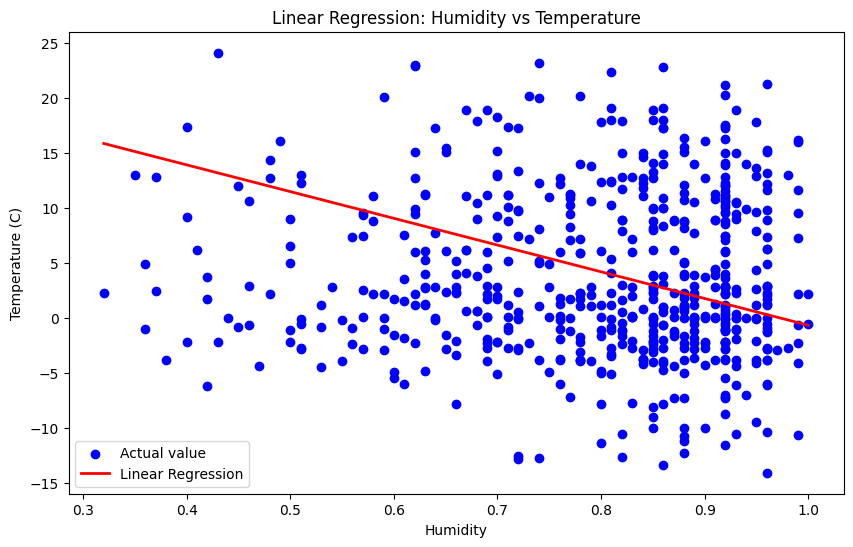

In [44]:
X = weather2[['Humidity']]
y = weather2['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

sorted_idx = X_test['Humidity'].argsort()
X_test = X_test.iloc[sorted_idx]
y_pred = y_pred[sorted_idx]


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual value')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('Linear Regression: Humidity vs Temperature')
plt.legend()
plt.show()

1. What type of machine learning problem is this?
#Regression Supervised Learning
2. How do the features relate to each other and to the
weather conditions?
#Answered in the Heatmap above

3. What are the steps involved in preprocessing the
dataset for machine learning?
#Filtering any odd data in the dataset
#Removing any empty rows
#sorting the dataset
#removing duplicate rows.
4. How do we select the best model for our dataset? Hint :
use different regression models and compare their
metrics
#by using different regression models and comparing their R^2 score and MSE

5. What metrics should we use to evaluate the
performance of our weather prediction model?

##By comparing actual data with our own predicted data for a set amount of time and measure accuracy
